# Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

# Table of Contents
1. [EDA](#EDA)
2. [Modelling](#Modelling)
3. [Results](#Results)
4. [Algorithm refinement](#Refinement) 
5. [Final Accuracy](#Accuracy)


In [1]:
import os 
import numpy as np
import time  
import scipy
import pandas as pd
import matplotlib
import seaborn as sns
import warnings

os. chdir("/Users/Ruairi/Google Drive/code/Python/Pima indians diabetes/pima-indians-diabetes-database")    

# EDA

First we read in and glance at the data

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Then we perform some basic exploration of this dataset

In [3]:
print('Rows & cols in this data: ', data.shape)

Rows & cols in this data:  (768, 9)


In [4]:
print('Missing data per column: ')
data.isnull().sum()

Missing data per column: 


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Plotting below we can see how many positive diagnoses are in the dataset 

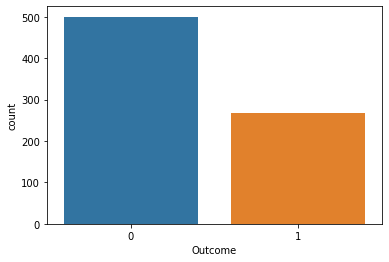

In [5]:
sns.countplot(x='Outcome',data=data)

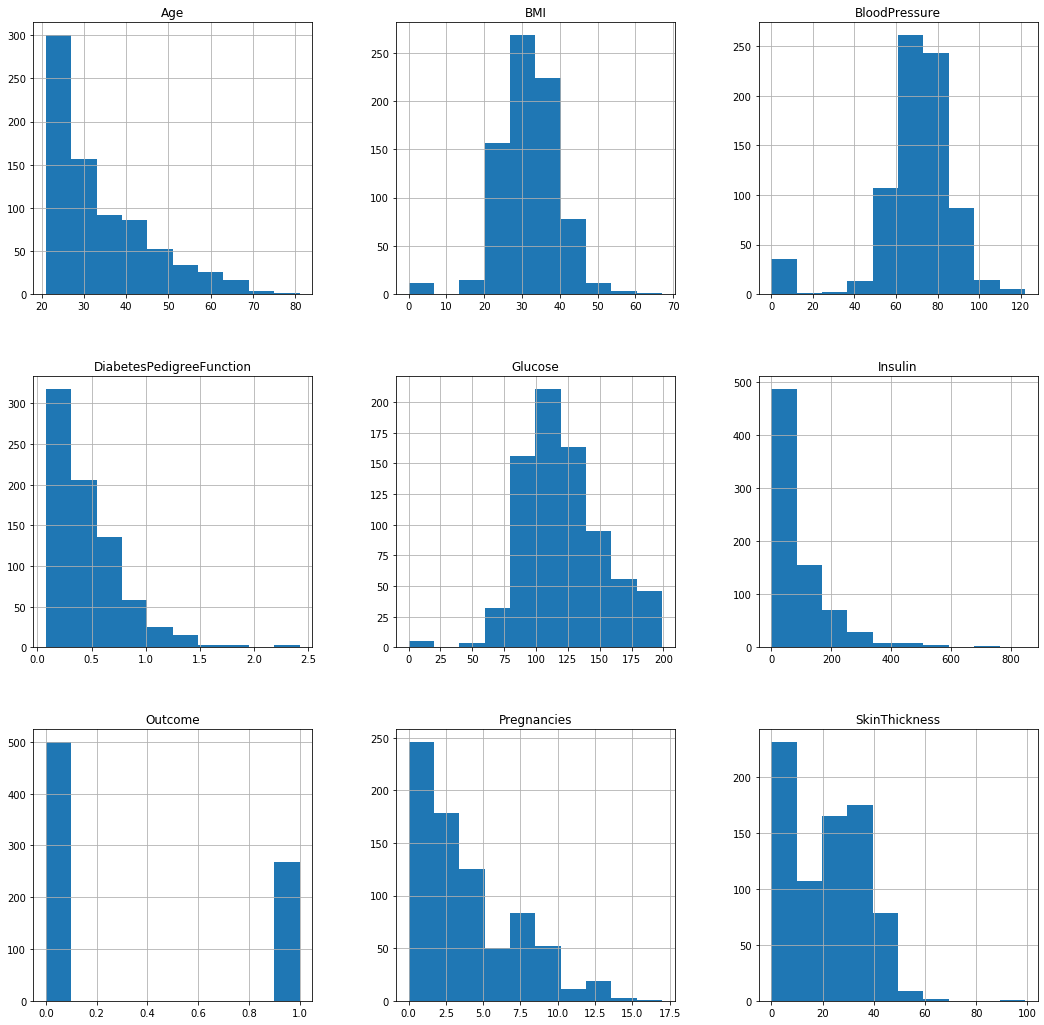

In [6]:
p = data.hist(figsize = (18,18))

In [7]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


A number of these variables have minimum values of 0, however, in the case of some, 0 is probably used as missing: 
- Insulin
- Skin thickness
- BMI
- Glucose 
- BP 



In [8]:
data_1 = data.copy(deep = True)
data_1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


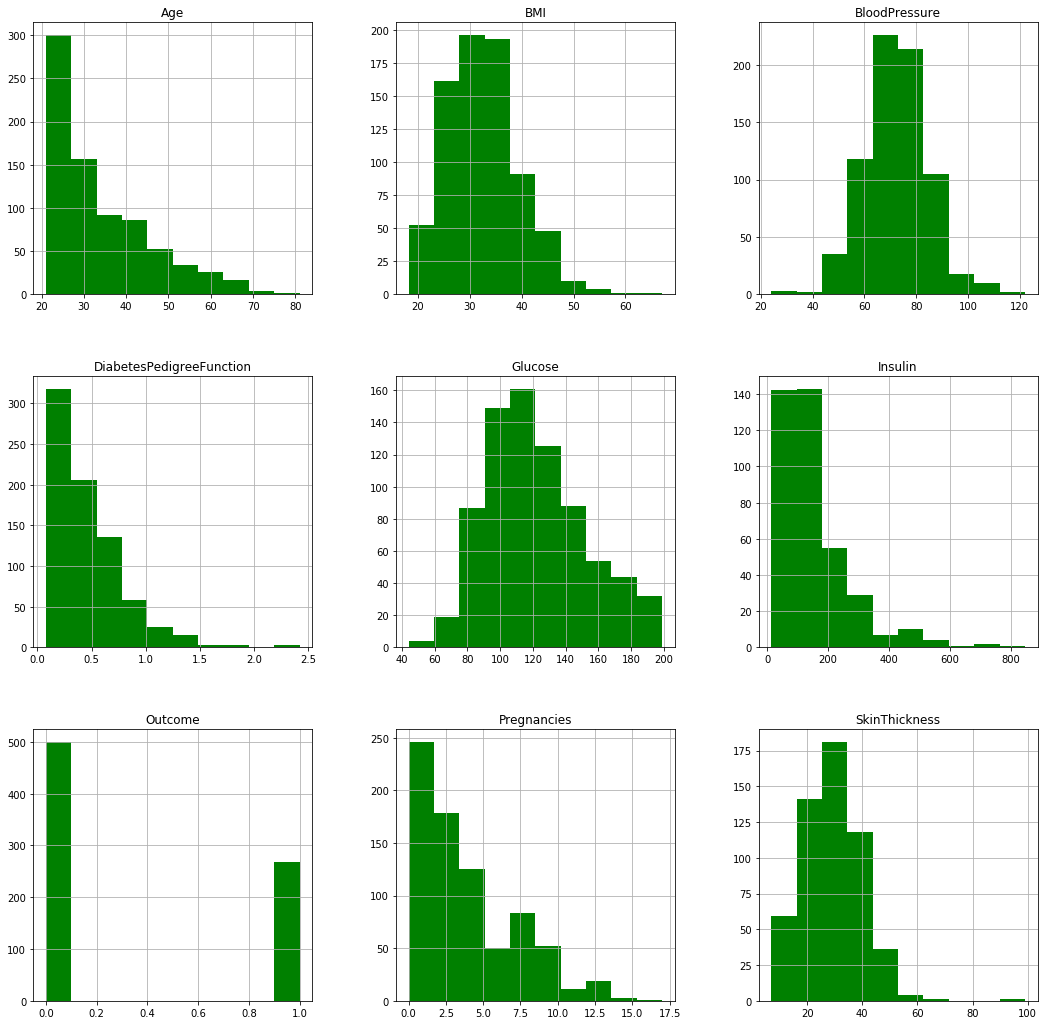

In [9]:
p = data_1.hist(figsize = (18,18), color = 'g')

In [10]:
print('Missing data per column: ')
data_1.isnull().sum()

Missing data per column: 


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing data treatment:

In [11]:
data_2=data_1.fillna(data_1.mean())

Below i plot a pairs plot which doesn't demonstrate any definitive patterns, some variables do seem to have one or two outliers however. 

/Users/Ruairi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Ruairi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


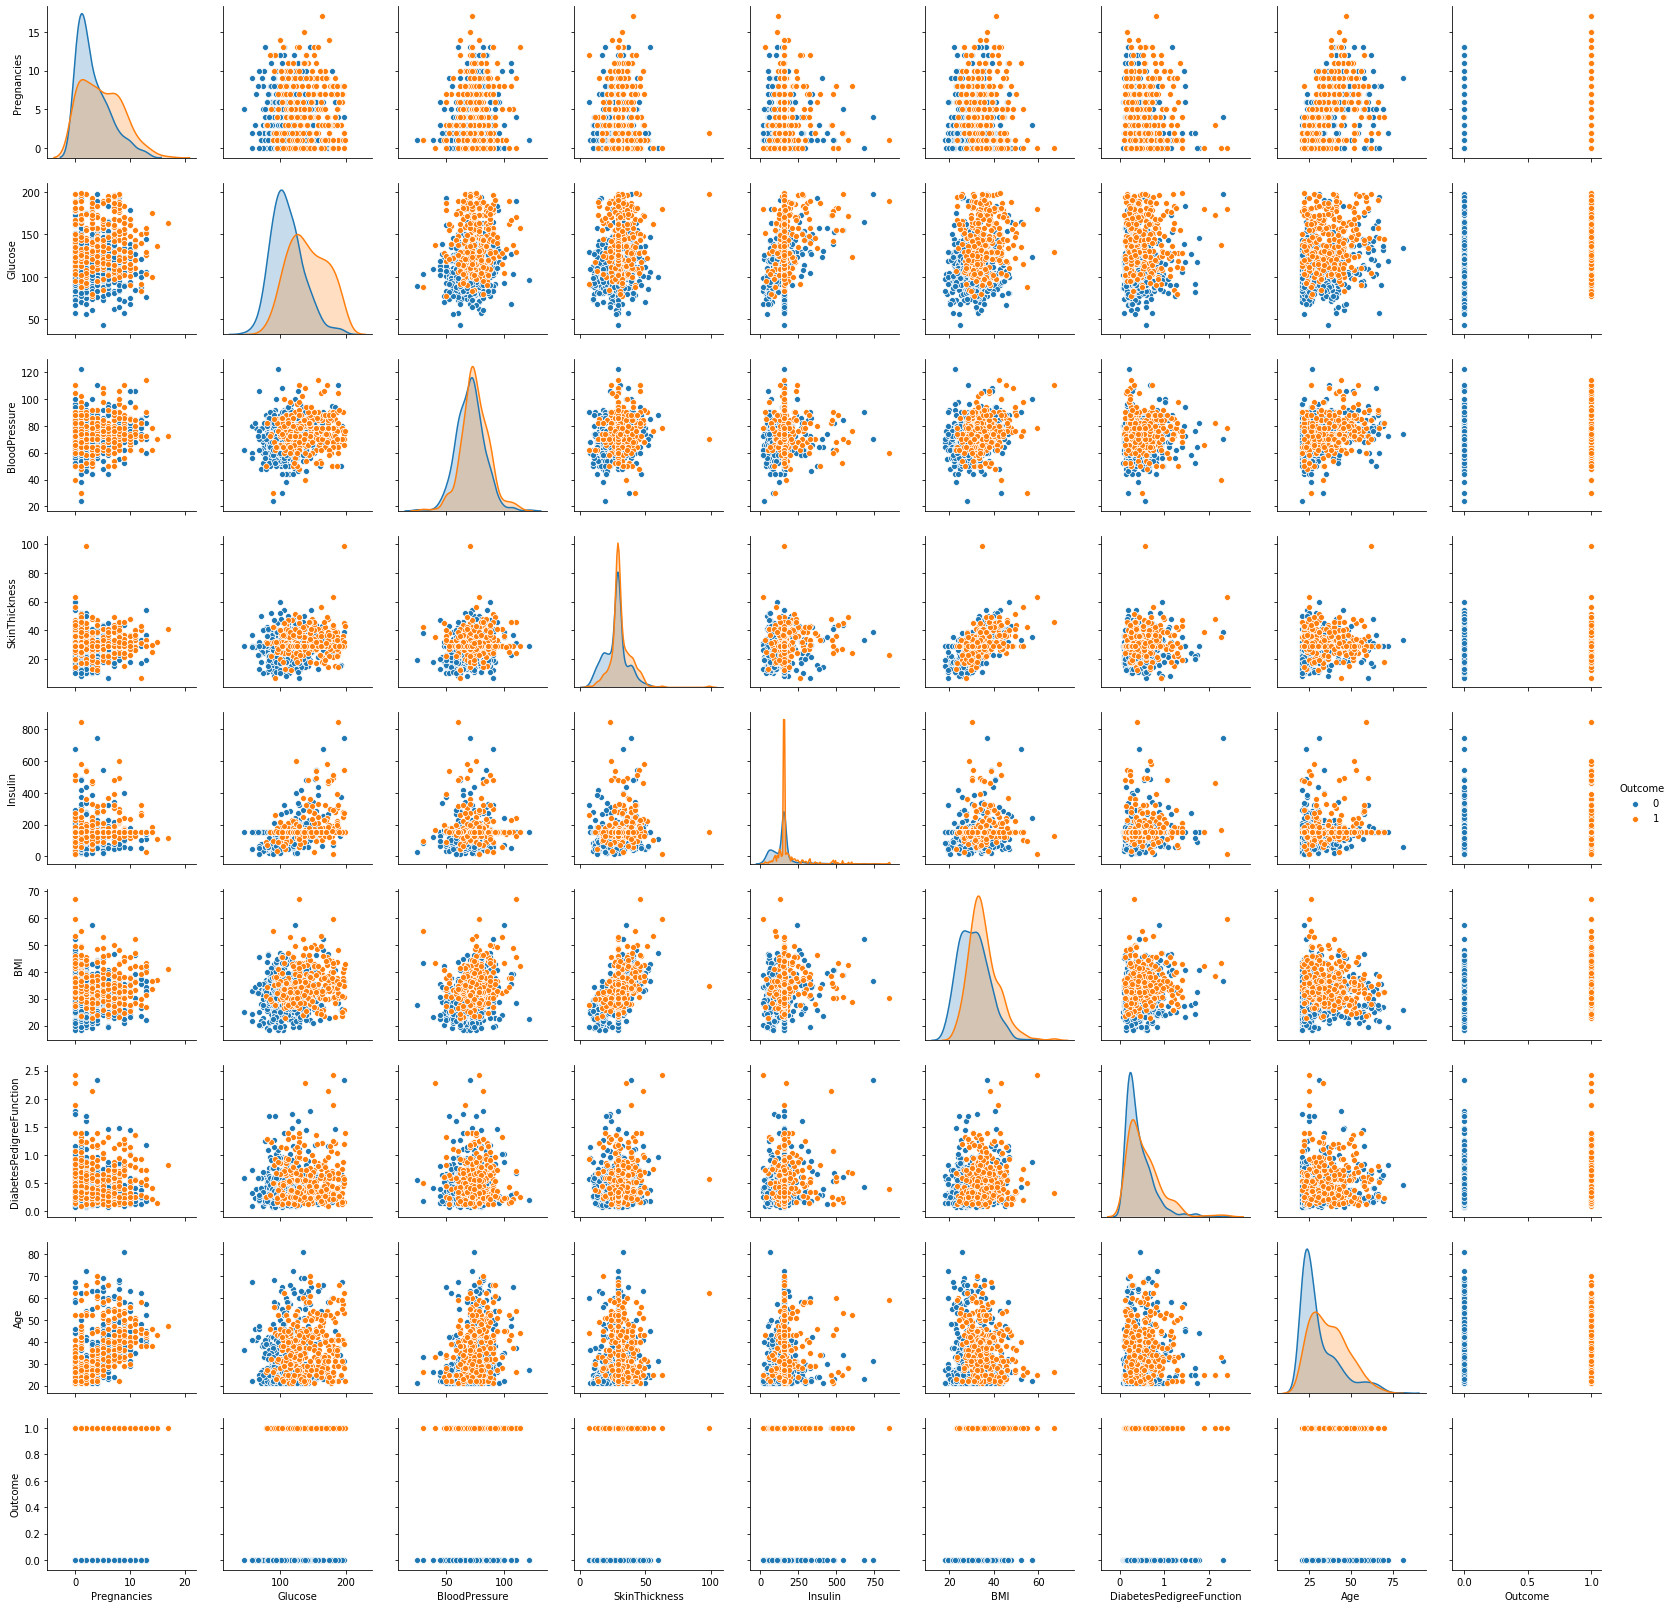

In [12]:
sns.pairplot(data_2, hue = 'Outcome')

Now I explore the correlations in the data:

In [13]:
corr=data_2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.127911,0.208522,0.0829891,0.056027,0.0215651,-0.0335227,0.544341,0.221898
Glucose,0.127911,1,0.218367,0.192991,0.420157,0.230941,0.13706,0.266534,0.492928
BloodPressure,0.208522,0.218367,1,0.192816,0.0725169,0.281268,-0.00276336,0.324595,0.166074
SkinThickness,0.0829891,0.192991,0.192816,1,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.0725169,0.158139,1,0.166586,0.0986339,0.136734,0.214411
BMI,0.0215651,0.230941,0.281268,0.542398,0.166586,1,0.1534,0.0255192,0.311924
DiabetesPedigreeFunction,-0.0335227,0.13706,-0.00276336,0.100966,0.0986339,0.1534,1,0.0335613,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.0255192,0.0335613,1,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1


# Modelling

Below I train and evaluate a number of machine learning algorithms available in the sklearn module

In [14]:
# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [15]:
X = data.iloc[:, :-1] # all up to X
y = data.iloc[:, -1] # all up to Y 
# then we split into test train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [16]:
warnings.filterwarnings('ignore')

# common algo names
names = ["Nearest Neighbors",
         "Linear support vector machine",
         "Decision Tree", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",
         "Naive Bayes", 
         "Quadratic discriminant analysis"
        ]

# models from sklearn
models = [
    KNeighborsClassifier(), # knn 
    SVC(kernel="linear"), # svm
    DecisionTreeClassifier(), # dt
    RandomForestClassifier(), # rf
    MLPClassifier(), # nn 
    AdaBoostClassifier(), # adab
    GaussianNB(), # nb
    QuadraticDiscriminantAnalysis() # qda
]

# iterate over classifiers
results = {}
for name, clf in zip(names, models): # for each alorithm let us 
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    results[name] = scores

# Results

[(0.5, 1), Text(0, 0.5, 'Classification Accuracy'), Text(0.5, 0, 'Algorithm')]

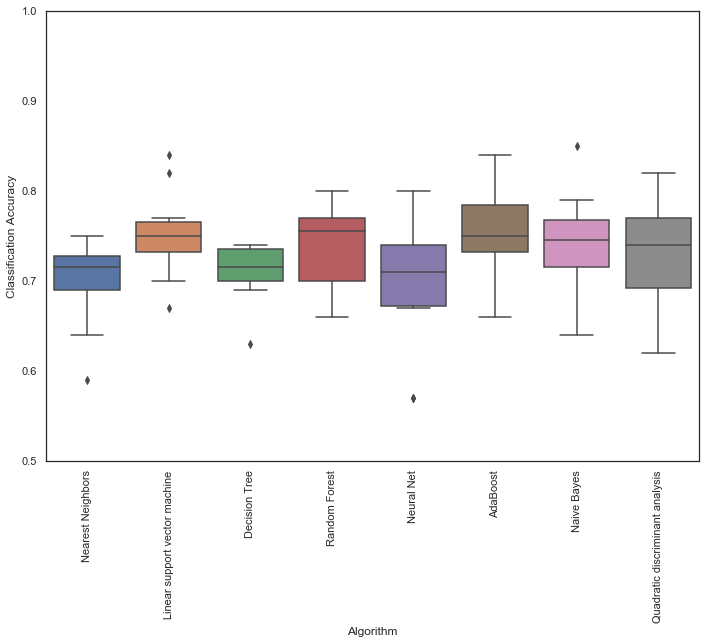

In [17]:
from matplotlib import pyplot
import seaborn as sns

x=pd.DataFrame(results).T.round(2)
x=pd.DataFrame(x)
y=x.T.melt()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
g=sns.boxplot(x="variable", y="value", data=y)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
print('')
g.set(ylim=(0.5, 1), xlabel='Algorithm', ylabel='Classification Accuracy')


In [18]:
y.groupby('variable').mean()

,value
variable,
AdaBoost,0.748
Decision Tree,0.709
Linear support vector machine,0.752
Naive Bayes,0.743
Nearest Neighbors,0.697
Neural Net,0.698
Quadratic discriminant analysis,0.730
Random Forest,0.737


# Refinement 

It seems that of all of the 'out of the box' classifiers, the highest accuracy is achieved by the linear SVM. 

So what is a linear SVM? 

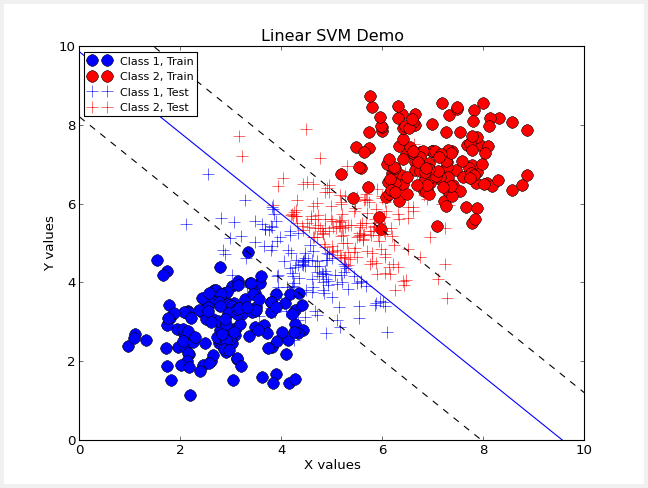

Very broadly, the support vector machine algorithm aims to define a linear seperation of the data to define classes. This seperating line is known as a hyperplane, SVM defines an optimal hyperplane by minimising the distance between a given line and the 'nearest' points, which we term support vectors. Often, there is no means of separating data in this way, unless these data are transformed into a higher dimension space.  

There are two important parameters in the SVM algorithm: 
C controls the influence of each support vector, thus this process involves trading error penalty for stability. For larger values of C, a smaller margin will be accepted. 

gamma is a parameter to determine the influence of a single support vector, with low values meaning 'far' and high values meaning 'close'


Below i use the gridsearch of SVM to refine the model predictions. 

In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV

# 
clf = SVC(kernel="linear", random_state = 123)

# establish a grid of potential values for the grid search
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [0.001, 0.0001], 
   'kernel': ['linear']},
 ]

grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(X_train, y_train)

In [ ]:
print("Best C: %f" % (grid.best_estimator_.C))
print("Best Gamma: %f" % (grid.best_estimator_.gamma))


In [ ]:
clf = SVC(kernel="linear", C=1, gamma = 0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = sum(y_pred == y_test) / float(len(y_test))

# Accuracy

In [ ]:
print("Final classification Accuracy: %.2f%%" % (100*accuracy))